In [1]:
import psycopg2
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
params = params = {
    "host": "localhost",
    "user": "postgres",
    "port": 5432,
    #"password": "şifre" 
}
connection = psycopg2.connect(**params, dbname= "postgres")

In [3]:
df = pd.read_sql("select * from public.spotify_log sl join public.spotify_track st on sl.track_id_clean = st.track_id;", connection)

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,4,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,11,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,17,20,t_bff5b6c6-6968-41be-b723-7e860b372975,False,True,True,False,0,1,...,4,0.283693,-0.837439,0.368295,0.271468,0.024429,-0.292806,0.032801,-0.485078,0.183784
4,0_0000a72b-09ac-412f-b452-9b9e79bded8f,2,20,t_0632570b-b4b4-4c3c-b47c-443ec9fbaa11,True,True,True,False,0,1,...,4,0.555482,0.203349,0.247835,-0.136071,-0.440866,0.680082,0.181352,-0.279335,0.001125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

In [6]:
df.date.unique()

array(['2018-07-15', '2018-07-14', '2018-07-13', '2018-07-12',
       '2018-06-05', '2018-07-11', '2018-07-16', '2018-07-10',
       '2018-07-04', '2018-07-05', '2018-07-07', '2018-07-06',
       '2018-05-12', '2018-07-09', '2018-06-29', '2018-06-30',
       '2018-06-19', '2018-05-18'], dtype=object)

In [7]:
def weekday_converter(date):
    format = '%Y-%m-%d'
    datetime_date = datetime.datetime.strptime(date,format)
    weekdays_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return weekdays_list[datetime_date.weekday()]

df = df.assign(weekday=df.date.apply(weekday_converter))
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,weekday
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,Sunday
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,Sunday
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,11,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187,Sunday
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,17,20,t_bff5b6c6-6968-41be-b723-7e860b372975,False,True,True,False,0,1,...,0.283693,-0.837439,0.368295,0.271468,0.024429,-0.292806,0.032801,-0.485078,0.183784,Sunday
4,0_0000a72b-09ac-412f-b452-9b9e79bded8f,2,20,t_0632570b-b4b4-4c3c-b47c-443ec9fbaa11,True,True,True,False,0,1,...,0.555482,0.203349,0.247835,-0.136071,-0.440866,0.680082,0.181352,-0.279335,0.001125,Sunday


In [8]:
def track_age_calculator(year):
    return 2022-year

df = df.assign(track_age=df.release_year.apply(track_age_calculator))
df[['release_year','track_age']]

,release_year,track_age
0,2018,4
1,2018,4
2,2018,4
3,2018,4
4,1974,48
...,...,...
167875,2015,7
167876,2018,4
167877,2018,4
167878,2018,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

In [10]:
df.drop('session_id', inplace=True, axis=1)
df.drop('track_id_clean', inplace=True, axis=1)
df.drop('skip_1', inplace=True, axis=1)
df.drop('skip_3', inplace=True, axis=1)
df.drop('not_skipped', inplace=True, axis=1)
df.drop('date', inplace=True, axis=1)
df.drop('track_id', inplace=True, axis=1)





In [11]:
df.drop('context_type', inplace=True, axis=1)
df.drop('hist_user_behavior_reason_start', inplace=True, axis=1)
df.drop('hist_user_behavior_reason_end', inplace=True, axis=1)
df.drop('weekday', inplace=True, axis=1)
df.drop('mode', inplace=True, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   session_position               167880 non-null  int64  
 1   session_length                 167880 non-null  int64  
 2   skip_2                         167880 non-null  bool   
 3   context_switch                 167880 non-null  int64  
 4   no_pause_before_play           167880 non-null  int64  
 5   short_pause_before_play        167880 non-null  int64  
 6   long_pause_before_play         167880 non-null  int64  
 7   hist_user_behavior_n_seekfwd   167880 non-null  int64  
 8   hist_user_behavior_n_seekback  167880 non-null  int64  
 9   hist_user_behavior_is_shuffle  167880 non-null  bool   
 10  hour_of_day                    167880 non-null  int64  
 11  premium                        167880 non-null  bool   
 12  duration                      

In [13]:
df["skip_2"] = df["skip_2"].astype(int)
df["hist_user_behavior_is_shuffle"] = df["hist_user_behavior_is_shuffle"].astype(int)
df["premium"] = df["premium"].astype(int)

In [14]:
target_count = df.skip_2.value_counts(normalize=True)
target_count

1    0.517179
0    0.482821
Name: skip_2, dtype: float64

In [15]:
columns = df.columns.tolist()
columns = [columns[2]] + columns[0:2] + columns[3:]
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   skip_2                         167880 non-null  int64  
 1   session_position               167880 non-null  int64  
 2   session_length                 167880 non-null  int64  
 3   context_switch                 167880 non-null  int64  
 4   no_pause_before_play           167880 non-null  int64  
 5   short_pause_before_play        167880 non-null  int64  
 6   long_pause_before_play         167880 non-null  int64  
 7   hist_user_behavior_n_seekfwd   167880 non-null  int64  
 8   hist_user_behavior_n_seekback  167880 non-null  int64  
 9   hist_user_behavior_is_shuffle  167880 non-null  int64  
 10  hour_of_day                    167880 non-null  int64  
 11  premium                        167880 non-null  int64  
 12  duration                      

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [17]:
train_df = X_train.copy()
train_df['skip_2'] = y_train

train_df['target'] = train_df['skip_2'].apply(lambda x: (x and 'skipped') or 'not_skipped')
train_df.head()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,track_age,skip_2,target
152237,8,20,1,1,0,0,0,0,0,19,...,0.312882,0.100725,0.070299,-0.386122,-0.018106,-0.373088,0.304193,5,0,not_skipped
45394,2,11,0,1,0,0,0,0,0,14,...,0.259497,0.195060,0.194590,-0.258621,-0.061902,-0.535236,0.141201,4,0,not_skipped
56419,10,19,0,1,0,0,0,0,1,18,...,0.350175,0.201910,0.143652,-0.315812,-0.043601,-0.351870,0.168161,4,1,skipped
119516,11,20,0,1,0,0,0,0,1,15,...,0.325331,0.298820,0.112179,-0.323785,0.003466,-0.487950,0.183416,6,1,skipped
50752,14,20,0,1,0,0,0,0,1,16,...,0.366311,0.262003,0.129354,-0.358271,-0.051509,-0.560788,0.155499,4,0,not_skipped


In [18]:
#sns.pairplot(train_df, hue='target');

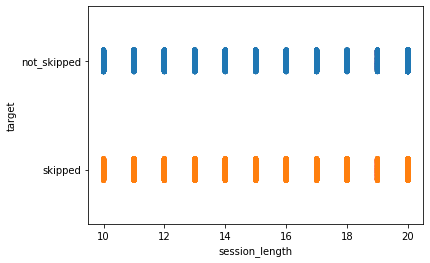

In [19]:
sns.stripplot(x='session_length', y='target', data=train_df, alpha=0.6);

In [20]:
lm1 = LogisticRegression(solver='liblinear')
lm1.fit(X_train[['session_length']].values, y_train)

LogisticRegression(solver='liblinear')

In [21]:
print("Training Accuracy:", round(lm1.score(X_train[['session_length']].values, y_train), 3))
print("Testing Accuracy:", round(lm1.score(X_test[['session_length']].values, y_test), 3))

Training Accuracy: 0.542
Testing Accuracy: 0.537


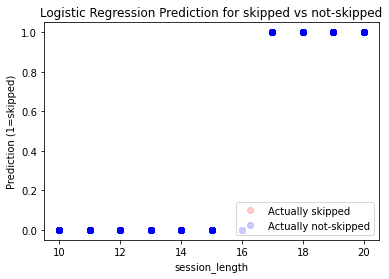

In [22]:
feature = train_df[['session_length']].values # Eğitimde kullandığım özellikler
prediction_train = lm1.predict(feature) # Bu özellikleri input olarak kullanarak tahmin gerçekleştirme

sf_mask = (train_df['target'] == 'skipped')

plt.plot(feature[sf_mask], prediction_train[sf_mask], 'ro', label='Actually skipped', alpha=0.2)
plt.plot(feature[~sf_mask], prediction_train[~sf_mask], 'bo', label='Actually not-skipped', alpha=0.2)
plt.xlabel('session_length')
plt.ylabel('Prediction (1=skipped)')
plt.title('Logistic Regression Prediction for skipped vs not-skipped')
plt.legend(loc='lower right');

In [23]:
lm1.predict([[10],[14],[18]])

array([0, 0, 1])

In [24]:
lm1.predict_proba([[10],[14],[18]])

array([[0.57164597, 0.42835403],
       [0.52550388, 0.47449612],
       [0.47892211, 0.52107789]])

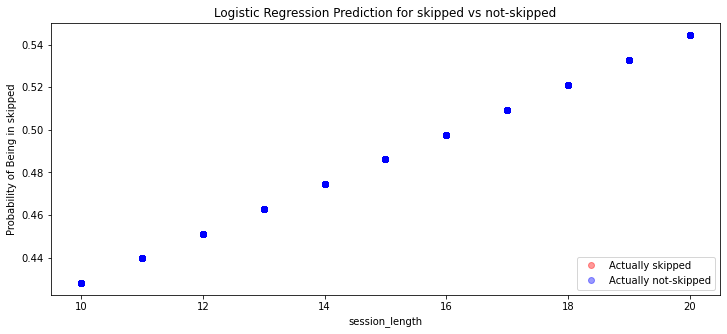

In [25]:
prediction_soft = lm1.predict_proba(feature)[:, 1]
plt.figure(figsize=[12,5])
plt.plot(feature[sf_mask], prediction_soft[sf_mask], 'ro', label='Actually skipped',alpha=0.4)
plt.plot(feature[~sf_mask], prediction_soft[~sf_mask], 'bo', label='Actually not-skipped',alpha=0.4)
plt.xlabel('session_length')
plt.ylabel('Probability of Being in skipped')
plt.title('Logistic Regression Prediction for skipped vs not-skipped')
plt.legend(loc='lower right');

In [26]:
print(lm1.coef_, lm1.intercept_)
print('Cut-Off Value:', abs(lm1.intercept_ / lm1.coef_))

[[0.04661642]] [-0.75473406]
Cut-Off Value: [[16.1903042]]


In [27]:
prediction_test = lm1.predict(X_test[['session_length']].values)

In [28]:
confusion_matrix(y_train, prediction_train) # Eğitim veri setimize ait hata matrisi

array([[21530, 43334],
       [18177, 51263]])

In [29]:
confusion_matrix(y_test, prediction_test) # Test veri setimize ait hata matrisi

array([[ 5313, 10879],
       [ 4680, 12704]])

In [30]:
std_scale = StandardScaler()

X_train = train_df[['session_length', 'context_switch']]
X_train_scaled = std_scale.fit_transform(X_train) # Eğitim veri seti için fit_transform

X_test = X_test[['session_length', 'context_switch']]
X_test_scaled = std_scale.transform(X_test) # Test veri seti için transform

lm2 = LogisticRegression(solver='liblinear')
lm2.fit(X_train_scaled, y_train)
print("Training Accuracy:", round(lm2.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(lm2.score(X_test_scaled, y_test),3))

Training Accuracy: 0.549
Testing Accuracy: 0.544
